# BDI - Extract MFN_BMK.M.020.922.0.EUR.210 Data

This notebook extracts data from the BDI Excel report, specifically the column MFN_BMK.M.020.922.0.EUR.210 along with the date column DATA_OSS.

The output CSV will contain the date and value columns, with backward fill (bfill) applied to handle missing values.


In [1]:
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Suppress openpyxl style warnings (innocuous warnings about missing default styles)
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')


In [2]:
# Change to project root directory
# Find the project root by looking for the 'data' directory
current_dir = os.getcwd()
while not os.path.exists(os.path.join(current_dir, 'data')):
    parent_dir = os.path.dirname(current_dir)
    if parent_dir == current_dir:
        # Reached filesystem root without finding 'data' directory
        raise FileNotFoundError("Could not find project root directory (looking for 'data' folder)")
    current_dir = parent_dir

os.chdir(current_dir)
print(f"Working directory: {os.getcwd()}")

# Define input and output files
input_file = 'data/bdi/BMK0100/REPORT_06-12-2025_11-27_1765016876665.xlsx'
output_file = 'data/bdi/BMK0100/MFN_BMK.M.020.922.0.EUR.210.csv'

# Check that the input file exists
if not os.path.exists(input_file):
    raise FileNotFoundError(f"File not found: {input_file}")

print(f"Input file: {input_file}")
print(f"Output file: {output_file}")


Working directory: /workspace
Input file: data/bdi/BMK0100/REPORT_06-12-2025_11-27_1765016876665.xlsx
Output file: data/bdi/BMK0100/MFN_BMK.M.020.922.0.EUR.210.csv


In [3]:
# Read the Excel file without header to analyze structure
print("Reading Excel file (first 5 rows to analyze structure)...")
df_raw = pd.read_excel(input_file, header=None, nrows=5)

print(f"First 5 rows (raw):")
print(df_raw.to_string())
print(f"\nAnalyzing structure...")

# Find the row with DATA_OSS (should be row 2, column 0)
# Find the column with MFN_BMK.M.020.922.0.EUR.210 (should be row 1)
date_col_idx = None
value_col_idx = None

# Look for DATA_OSS in row 2 (index 2)
if len(df_raw) > 2:
    row2 = df_raw.iloc[2]
    for idx, val in enumerate(row2):
        if pd.notna(val) and 'DATA_OSS' in str(val):
            date_col_idx = 0  # DATA_OSS is always in column 0
            print(f"Found DATA_OSS in row 2, column {date_col_idx}")
            break

# Look for MFN_BMK.M.020.922.0.EUR.210 in row 1 (index 1)
if len(df_raw) > 1:
    row1 = df_raw.iloc[1]
    for idx, val in enumerate(row1):
        if pd.notna(val) and 'MFN_BMK.M.020.922.0.EUR.210' in str(val):
            value_col_idx = idx
            print(f"Found MFN_BMK.M.020.922.0.EUR.210 in row 1, column {value_col_idx}")
            break

if date_col_idx is None or value_col_idx is None:
    raise ValueError(f"Could not find required columns. Date col: {date_col_idx}, Value col: {value_col_idx}")

# Now read the full file, skipping the first 2 rows (rows 0 and 1) and using row 2 as header
# But we'll manually set column names
print(f"\nReading full file (skipping first 2 rows, data starts at row 3)...")
df = pd.read_excel(input_file, header=None, skiprows=2)

# Set column names manually
df.columns = [f'col_{i}' for i in range(len(df.columns))]

# Extract only the date column (index 0) and value column
date_col_name = df.columns[date_col_idx]
value_col_name = df.columns[value_col_idx]

print(f"Using columns: {date_col_name} (date), {value_col_name} (value)")
print(f"\nData shape: {df.shape}")
print(f"\nFirst few rows:")
print(df[[date_col_name, value_col_name]].head())


Reading Excel file (first 5 rows to analyze structure)...
First 5 rows (raw):
                                   0                                                             1                                                                       2                                                                          3                                                                       4                                                                         5                                                            6                                                            7
0                            BMK0100  [BMK0100] Titoli di Stato guida: rendimenti a scadenza lordi                                                                     NaN                                                                        NaN                                                                     NaN                                                                       NaN                 

In [4]:
# Extract the required columns and rename them
df_extracted = df[[date_col_name, value_col_name]].copy()
df_extracted.columns = ['DATA_OSS', 'MFN_BMK.M.020.922.0.EUR.210']

date_col = 'DATA_OSS'
value_col = 'MFN_BMK.M.020.922.0.EUR.210'

print(f"Extracted columns:")
print(f"  Date column: {date_col}")
print(f"  Value column: {value_col}")

print(f"\nExtracted data shape: {df_extracted.shape}")
print(f"\nFirst few rows of extracted data:")
print(df_extracted.head())
print(f"\nData info:")
print(df_extracted.info())
print(f"\nMissing values:")
print(df_extracted.isnull().sum())


Extracted columns:
  Date column: DATA_OSS
  Value column: MFN_BMK.M.020.922.0.EUR.210

Extracted data shape: (445, 2)

First few rows of extracted data:
                            DATA_OSS MFN_BMK.M.020.922.0.EUR.210
0  [DATA_OSS] Data dell'osservazione             [VALORE] Valore
1     [2025-10-31 00:00:00] 2025-ott                     3.44212
2     [2025-09-30 00:00:00] 2025-set                     3.55866
3     [2025-08-31 00:00:00] 2025-ago                     3.53833
4     [2025-07-31 00:00:00] 2025-lug                     3.53735

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   DATA_OSS                     445 non-null    object
 1   MFN_BMK.M.020.922.0.EUR.210  416 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB
None

Missing values:
DATA_OSS                        0
MFN_BMK.M.020.92

In [5]:
# Remove the header row if it exists (contains "DATA_OSS" or "VALORE")
df_extracted = df_extracted[
    ~df_extracted[date_col].astype(str).str.contains('DATA_OSS', na=False)
].copy()

# Clean the date column - it may contain strings like "[2025-10-31 00:00:00] 2025-ott"
# Extract just the date part
def clean_date(date_val):
    if pd.isna(date_val):
        return None
    date_str = str(date_val)
    # Try to extract date from format like "[2025-10-31 00:00:00] 2025-ott"
    if '[' in date_str and ']' in date_str:
        # Extract the part between [ and ]
        start = date_str.find('[') + 1
        end = date_str.find(']')
        date_str = date_str[start:end].split()[0]  # Take first part before space
    return date_str

# Apply date cleaning
df_extracted[date_col] = df_extracted[date_col].apply(clean_date)

# Convert date column to datetime with explicit format to avoid warnings
# Format is YYYY-MM-DD (e.g., 2025-10-31)
df_extracted[date_col] = pd.to_datetime(df_extracted[date_col], format='%Y-%m-%d', errors='coerce')

# Remove rows where date is invalid
df_extracted = df_extracted[df_extracted[date_col].notna()].copy()

# Sort by date to ensure proper order
df_extracted = df_extracted.sort_values(by=date_col).reset_index(drop=True)

print(f"Date range: {df_extracted[date_col].min()} to {df_extracted[date_col].max()}")
print(f"Total rows: {len(df_extracted)}")
print(f"\nMissing values before bfill:")
print(df_extracted.isnull().sum())


Date range: 1988-12-31 00:00:00 to 2025-10-31 00:00:00
Total rows: 443

Missing values before bfill:
DATA_OSS                        0
MFN_BMK.M.020.922.0.EUR.210    28
dtype: int64


In [6]:
# Convert value column to numeric (removing any non-numeric rows like header)
df_extracted[value_col] = pd.to_numeric(df_extracted[value_col], errors='coerce')

# Apply backward fill (bfill) to fill missing values
# This fills missing values with the next available value
df_extracted[value_col] = df_extracted[value_col].bfill()

print(f"Missing values after bfill:")
print(df_extracted.isnull().sum())
print(f"\nFinal data preview:")
print(df_extracted.head(10))
print(f"\n...")
print(df_extracted.tail(10))


Missing values after bfill:
DATA_OSS                       0
MFN_BMK.M.020.922.0.EUR.210    0
dtype: int64

Final data preview:
    DATA_OSS  MFN_BMK.M.020.922.0.EUR.210
0 1988-12-31                     13.43335
1 1989-01-31                     13.43335
2 1989-02-28                     13.43335
3 1989-03-31                     13.43335
4 1989-04-30                     13.43335
5 1989-05-31                     13.43335
6 1989-06-30                     13.43335
7 1989-07-31                     13.43335
8 1989-08-31                     13.43335
9 1989-09-30                     13.43335

...
      DATA_OSS  MFN_BMK.M.020.922.0.EUR.210
433 2025-01-31                      3.67594
434 2025-02-28                      3.57541
435 2025-03-31                      3.88713
436 2025-04-30                      3.71151
437 2025-05-31                      3.62922
438 2025-06-30                      3.50068
439 2025-07-31                      3.53735
440 2025-08-31                      3.53833
441 2025-

In [7]:
# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_file), exist_ok=True)

# Save to CSV
df_extracted.to_csv(output_file, index=False)
print(f"File saved successfully: {output_file}")
print(f"Dimensions: {len(df_extracted)} rows, {len(df_extracted.columns)} columns")
print(f"\nFinal data summary:")
print(df_extracted.describe())


File saved successfully: data/bdi/BMK0100/MFN_BMK.M.020.922.0.EUR.210.csv
Dimensions: 443 rows, 2 columns

Final data summary:
                            DATA_OSS  MFN_BMK.M.020.922.0.EUR.210
count                            443                   443.000000
mean   2007-05-31 14:50:39.277652480                     5.628532
min              1988-12-31 00:00:00                     0.578010
25%              1998-03-15 12:00:00                     3.537840
50%              2007-05-31 00:00:00                     4.418310
75%              2016-08-15 12:00:00                     6.064285
max              2025-10-31 00:00:00                    14.419450
std                              NaN                     3.764029


Plot saved to: data/bdi/BMK0100/MFN_BMK.M.020.922.0.EUR.210_plot.png


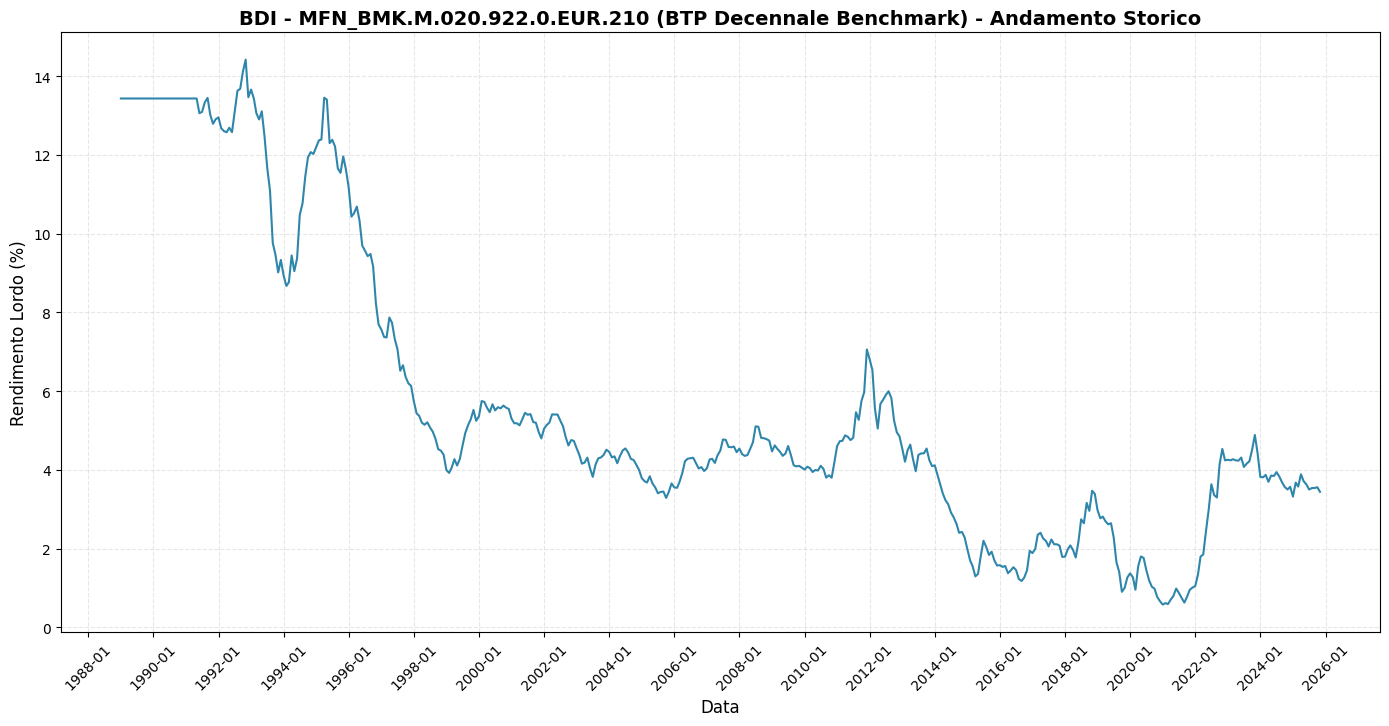

In [8]:
# Create a plot of the data
plt.figure(figsize=(14, 7))
plt.plot(df_extracted[date_col], df_extracted[value_col], linewidth=1.5, color='#2E86AB')
plt.title('BDI - MFN_BMK.M.020.922.0.EUR.210 (BTP Decennale Benchmark) - Andamento Storico', 
          fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Rendimento Lordo (%)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Show every 2 years
plt.xticks(rotation=45)

# Save plot
plot_file = os.path.join(os.path.dirname(output_file), 'MFN_BMK.M.020.922.0.EUR.210_plot.png')
plt.savefig(plot_file, dpi=150, bbox_inches='tight')
print(f"Plot saved to: {plot_file}")

plt.show()
